# Pandas 🐼 🐼 🐼

[Pandas Website](https://pandas.pydata.org/)

Pandas is a data analysis, manipulation, and visualization library. It's become a go-to tool for data scientists. Pandas not only provides many useful methods for working with data, but it's also quite fast because it vectorizes many operations, performing operations in parallel rather than one by one.

There have been whole books written about Pandas and it's feature set is vast. Here, my goal is to demonstrate at a basic level _what Pandas can do_ in terms of loading, filtering, and visualizing data so you can determine if it's a tool you want to learn more about.

The [Pandas API documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html#api) is excellent and each method has a set of concrete examples below its list of parameters. There's a lot of nuance to some of these concepts, and many functions can do what we want but only if we use a few of their many parameters.

Pands was mentioned in the talk [_Encoding Reparative Description: Developing Tools to Analyze Problematic Finding Aids_](https://osf.io/rv8qe/) where [notebooks](https://github.com/jiaqili0803/ReConnect-ReCollect_Automation) were used to map EAD metadata into Pandas dataframes to perform analysis. This shows Pandas can do more than just work with CSVs and numbers, their usage was closer to something I imagine OpenRefine doing.


## Loading Data

Let's import panda and load data from a CSV file. I've included some anonymized reference interactions in this repo as an example.

In [3]:
import pandas as pd # common convention to reference pandas as "pd"
from pathlib import Path

df = pd.read_csv(Path('assets', 'reference_interactions.csv')) # read the data from the csv file
df.head() # head(N) displays the first N rows of the dataframe (N=5 by default)

,datetime,email,type,mode,patron category,topics,location,duration
0,9/1/2023 10:54:50,calypso@cca.edu,Directional,Chat,Faculty,NaN,Aeaea,11
1,9/1/2023 11:09:25,circe@cca.edu,Reference,Email,Faculty,NaN,Aeaea,94
2,9/1/2023 13:18:22,calypso@cca.edu,Directional,Chat,Undergrad,NaN,Aeaea,35
3,9/5/2023 8:53:28,circe@cca.edu,Service,Email,Other,NaN,Aeaea,60
4,9/5/2023 11:27:44,circe@cca.edu,Service,Email,Staff,NaN,Aeaea,75


Pandas can load data from many different sources, including CSV, Excel, SQL, and more. The functions are all named `read_{format}` like `read_excel()`, `read_sql()`, `read_json()`, `read_pickle()` (Python object serialization).

The data we load must be _tabular_ in nature, as in we can interpret is as having rows and columns like a spreadsheet. A deeply nested JSON file would not work, for example. Data is read into a `DataFrame` object, the primary data structure in Pandas, which we will discuss further below.

There are a few other DataFrame methods which give us a peek at our data, such as `tail()` (same as head except it's the final N rows), `info()`, and `describe()`.

`DataFrame.info()` summarize our data, showing our columns, how many non-null values they have, and their data types. We will discuss data types more below (what looks wrong from this output?).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   datetime         301 non-null    object
 1   email            301 non-null    object
 2   type             301 non-null    object
 3   mode             301 non-null    object
 4   patron category  286 non-null    object
 5   topics           134 non-null    object
 6   location         301 non-null    object
 7   duration         301 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 18.9+ KB


`DataFrame.describe()` shows summary statistics for our columns, such as the number of unique values and the value that appears most frequently.

In [5]:
df.describe(exclude=[int])
# exclude=[int] excludes the integer (duration) column from the describe() output
# otherwise describe() really only looks at the one "duration" column

,datetime,email,type,mode,patron category,topics,location
count,301,301,301,301,286,134,301
unique,301,8,4,6,6,12,2
top,9/1/2023 10:54:50,calypso@cca.edu,Technical/Computing,Email,Faculty,Moodle,Aeaea
freq,1,114,122,140,166,70,238


`DataFrame.shape` shows how many rows and columns we have as a `(rows, columns)` tuple.

In [6]:
df.shape

(301, 8)

## Dataframes

When data is loaded into Pandas, it's turned into a `dataframe`. What is a `dataframe`? It's a two-dimensional data structure _with an index_ column. Look at the result from `df.head()` above and notice the leftmost, unlabelled column. That wasn't in our original CSV files (open it to see), Pandas added it to give each row a unique identifier.

The [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation page lists its methods, a few of wihch will come up as we explore below.

## Series

A `Series` is a one-dimensional data structure in Pandas. It's a single column of a DataFrame. When we select a single column from a DataFrame, we get a Series. The [Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html) documentation page lists its methods.

Series can be accessed with bracket notation, like `df['column_name']` or dot notation like `df.column_name`. The former is preferred because it works with all column names, even those that conflict with DataFrame methods.

In [7]:
emails = df['email']
print(type(emails))
emails

<class 'pandas.core.series.Series'>


0         calypso@cca.edu
1           circe@cca.edu
2         calypso@cca.edu
3           circe@cca.edu
4           circe@cca.edu
              ...        
296       calypso@cca.edu
297       calypso@cca.edu
298    telemachus@cca.edu
299       calypso@cca.edu
300    telemachus@cca.edu
Name: email, Length: 301, dtype: object

Series share some of the investigative methods of DataFrames, like `head()`, `tail()`, and `describe()`.

In [8]:
emails.describe()

count                 301
unique                  8
top       calypso@cca.edu
freq                  114
Name: email, dtype: object

## Modifying Columns

Much as we can create a new DataFrame with a method and then re-assign it to the variable `df`, we can create assign derivatives or changes to columns. There are a couple nuances to how this works—[string methods](https://pandas.pydata.org/docs/user_guide/text.html#string-methods) and lambda functions—but let's just see how it works first.

In [9]:
# uppercase all the patron categories
df['patron category'] = df['patron category'].str.upper()
# create a new username column
df['username'] = df['email'].map(lambda email: email.split('@')[0])
# we can also rename columns
df = df.rename(columns={"patron category": "category"})
df

,datetime,email,type,mode,category,topics,location,duration,username
0,9/1/2023 10:54:50,calypso@cca.edu,Directional,Chat,FACULTY,NaN,Aeaea,11,calypso
1,9/1/2023 11:09:25,circe@cca.edu,Reference,Email,FACULTY,NaN,Aeaea,94,circe
2,9/1/2023 13:18:22,calypso@cca.edu,Directional,Chat,UNDERGRAD,NaN,Aeaea,35,calypso
3,9/5/2023 8:53:28,circe@cca.edu,Service,Email,OTHER,NaN,Aeaea,60,circe
4,9/5/2023 11:27:44,circe@cca.edu,Service,Email,STAFF,NaN,Aeaea,75,circe
...,...,...,...,...,...,...,...,...,...
296,5/5/2024 13:14:31,calypso@cca.edu,Technical/Computing,Email,FACULTY,VAULT,Aeaea,52,calypso
297,5/6/2024 10:11:25,calypso@cca.edu,Service,Chat,FACULTY,NaN,Aeaea,71,calypso
298,5/6/2024 16:24:32,telemachus@cca.edu,Technical/Computing,Chat,FACULTY,NaN,Aeaea,59,telemachus
299,5/7/2024 12:17:12,calypso@cca.edu,Technical/Computing,Email,UNDERGRAD,VAULT,Aeaea,15,calypso


In general, it's a good idea to create new columns rather than modify existing ones, thus why we didn't modify and rename the `email` Series. This way, we can always go back to the original data if we need to.

Now let's return to those two nuances mentioned earlier. Why was our first line `df['patron category'].str.upper()` with a `str` accessor? Recall that `df['patron category']` is a Series, _not_ a string itself, and Series doesn't have an `upper()` method. Instead, when we want to apply a string method to a Series, we use the `str` accessor to apply it to each element in the Series. Pandas applies the changes in parallel with a vectorized operation, which is much faster than looping over each element.

The second line of code also has an interesting argument in the `map()` method. It's a lambda function, this is essentially an anonymous function being defined as an expression inside of `map()` as opposed to with `def`. We could simply write our own function with `def` and pass it that to map, and for complex operations that's the best choice, but for simple operations that fit on one line like splitting an email address `lambda` is quite convenient.

In [10]:
# overloaded operators like "+" and "*" do work element-wise on Series
# so let's make our usernames into emails again, then use a `def` function to split them
df['username'] = df['username'] + '@cca.edu'
print(df['username'].head(1))

def split_email(email):
    return email.split("@")[0]

df['username'] = df['username'].map(split_email)
df["username"].head(1)

0    calypso@cca.edu
Name: username, dtype: object


0    calypso
Name: username, dtype: object

We have a timestamp column `datetime`, but Pandas is treating it as a string right now. We can't do accurate sorting or aggregation with strings. We can convert it to a datetime object with `pd.to_datetime()`. Note that this is a top-level function in Pandas, not a method of a Series or DataFrame.

In [11]:
# convert datetime Series to datetime objects
df = df.rename(columns={"datetime": "datetime_str"})
df['datetime'] = pd.to_datetime(df['datetime_str'])
df.head()

,datetime_str,email,type,mode,category,topics,location,duration,username,datetime
0,9/1/2023 10:54:50,calypso@cca.edu,Directional,Chat,FACULTY,NaN,Aeaea,11,calypso,2023-09-01 10:54:50
1,9/1/2023 11:09:25,circe@cca.edu,Reference,Email,FACULTY,NaN,Aeaea,94,circe,2023-09-01 11:09:25
2,9/1/2023 13:18:22,calypso@cca.edu,Directional,Chat,UNDERGRAD,NaN,Aeaea,35,calypso,2023-09-01 13:18:22
3,9/5/2023 8:53:28,circe@cca.edu,Service,Email,OTHER,NaN,Aeaea,60,circe,2023-09-05 08:53:28
4,9/5/2023 11:27:44,circe@cca.edu,Service,Email,STAFF,NaN,Aeaea,75,circe,2023-09-05 11:27:44


## Filtering

Pandas does a neat trick with bracket notation which lets us use expressions to filter our data. It's sort of magical, honestly. We can pass in a boolean expression like `df['column_name'] == 'value'` inside the `df[]` brackets and Pandas returns a new DataFrame with only the rows that match our condition(s).

In [12]:
faculty = df[df['category'] == 'FACULTY']
faculty

,datetime_str,email,type,mode,category,topics,location,duration,username,datetime
0,9/1/2023 10:54:50,calypso@cca.edu,Directional,Chat,FACULTY,NaN,Aeaea,11,calypso,2023-09-01 10:54:50
1,9/1/2023 11:09:25,circe@cca.edu,Reference,Email,FACULTY,NaN,Aeaea,94,circe,2023-09-01 11:09:25
6,9/6/2023 10:40:19,circe@cca.edu,Reference,Email,FACULTY,NaN,Aeaea,93,circe,2023-09-06 10:40:19
12,9/7/2023 12:06:38,calypso@cca.edu,Service,Chat,FACULTY,Moodle,Aeaea,79,calypso,2023-09-07 12:06:38
13,9/7/2023 12:06:52,calypso@cca.edu,Technical/Computing,Chat,FACULTY,Moodle,Aeaea,96,calypso,2023-09-07 12:06:52
...,...,...,...,...,...,...,...,...,...,...
294,5/3/2024 14:38:19,calypso@cca.edu,Technical/Computing,Email,FACULTY,VAULT,Aeaea,19,calypso,2024-05-03 14:38:19
296,5/5/2024 13:14:31,calypso@cca.edu,Technical/Computing,Email,FACULTY,VAULT,Aeaea,52,calypso,2024-05-05 13:14:31
297,5/6/2024 10:11:25,calypso@cca.edu,Service,Chat,FACULTY,NaN,Aeaea,71,calypso,2024-05-06 10:11:25
298,5/6/2024 16:24:32,telemachus@cca.edu,Technical/Computing,Chat,FACULTY,NaN,Aeaea,59,telemachus,2024-05-06 16:24:32


We can use `isin()` to check if a value is in a list of values.

In [13]:
students = df[df['category'].isin(['UNDERGRAD', 'GRAD STUDENT'])]
students

,datetime_str,email,type,mode,category,topics,location,duration,username,datetime
2,9/1/2023 13:18:22,calypso@cca.edu,Directional,Chat,UNDERGRAD,NaN,Aeaea,35,calypso,2023-09-01 13:18:22
5,9/5/2023 16:18:11,cyclops@cca.edu,Reference,In Person,UNDERGRAD,NaN,Ithaca,70,cyclops,2023-09-05 16:18:11
10,9/6/2023 14:57:39,calypso@cca.edu,Technical/Computing,Chat,GRAD STUDENT,Moodle,Aeaea,50,calypso,2023-09-06 14:57:39
14,9/7/2023 15:26:23,cyclops@cca.edu,Reference,In Person,UNDERGRAD,NaN,Ithaca,90,cyclops,2023-09-07 15:26:23
20,9/8/2023 13:18:53,calypso@cca.edu,Technical/Computing,Chat,UNDERGRAD,Moodle,Aeaea,68,calypso,2023-09-08 13:18:53
...,...,...,...,...,...,...,...,...,...,...
252,2/25/2024 11:28:20,calypso@cca.edu,Technical/Computing,Email,UNDERGRAD,NaN,Aeaea,31,calypso,2024-02-25 11:28:20
259,3/4/2024 15:19:25,calypso@cca.edu,Reference,Email,UNDERGRAD,NaN,Aeaea,12,calypso,2024-03-04 15:19:25
275,4/1/2024 15:35:53,circe@cca.edu,Service,Email,GRAD STUDENT,NaN,Aeaea,29,circe,2024-04-01 15:35:53
291,4/29/2024 9:51:10,calypso@cca.edu,Technical/Computing,Email,UNDERGRAD,VAULT,Aeaea,48,calypso,2024-04-29 09:51:10


We can use multiple conditions with `&` for `and` and `|` for `or`. When using multiple conditions, we need to wrap each condition in parentheses. This has to do with operator precedence in Python.

In [14]:
# when using | or & to combine boolean Series, we must use parentheses to separate the conditions
faculty_ithaca = df[(df['category'] == 'FACULTY') & (df['location'] == 'Ithaca')]
print(f"{faculty.shape[0]} faculty interactions, {faculty_ithaca.shape[0]} of which were in Ithaca.")
# this has an identical outcome to our `isin()` example above
students = df[(df['category'] == 'UNDERGRAD') | (df['category'] == 'GRAD STUDENT')]
students

166 faculty interactions, 15 of which were in Ithaca.


,datetime_str,email,type,mode,category,topics,location,duration,username,datetime
2,9/1/2023 13:18:22,calypso@cca.edu,Directional,Chat,UNDERGRAD,NaN,Aeaea,35,calypso,2023-09-01 13:18:22
5,9/5/2023 16:18:11,cyclops@cca.edu,Reference,In Person,UNDERGRAD,NaN,Ithaca,70,cyclops,2023-09-05 16:18:11
10,9/6/2023 14:57:39,calypso@cca.edu,Technical/Computing,Chat,GRAD STUDENT,Moodle,Aeaea,50,calypso,2023-09-06 14:57:39
14,9/7/2023 15:26:23,cyclops@cca.edu,Reference,In Person,UNDERGRAD,NaN,Ithaca,90,cyclops,2023-09-07 15:26:23
20,9/8/2023 13:18:53,calypso@cca.edu,Technical/Computing,Chat,UNDERGRAD,Moodle,Aeaea,68,calypso,2023-09-08 13:18:53
...,...,...,...,...,...,...,...,...,...,...
252,2/25/2024 11:28:20,calypso@cca.edu,Technical/Computing,Email,UNDERGRAD,NaN,Aeaea,31,calypso,2024-02-25 11:28:20
259,3/4/2024 15:19:25,calypso@cca.edu,Reference,Email,UNDERGRAD,NaN,Aeaea,12,calypso,2024-03-04 15:19:25
275,4/1/2024 15:35:53,circe@cca.edu,Service,Email,GRAD STUDENT,NaN,Aeaea,29,circe,2024-04-01 15:35:53
291,4/29/2024 9:51:10,calypso@cca.edu,Technical/Computing,Email,UNDERGRAD,VAULT,Aeaea,48,calypso,2024-04-29 09:51:10


Below, we filter to a particular time range. This only works because we created a real `datetime` column earlier from strings. Note that we compare against another datetime object, not against a string.

In [15]:
from datetime import datetime
students_2024 = students[students['datetime'] > datetime(2023, 12, 31)]
students_2024.head()

,datetime_str,email,type,mode,category,topics,location,duration,username,datetime
132,1/4/2024 13:13:57,calypso@cca.edu,Service,Email,GRAD STUDENT,NaN,Aeaea,52,calypso,2024-01-04 13:13:57
143,1/10/2024 15:15:51,circe@cca.edu,Service,Email,UNDERGRAD,NaN,Aeaea,34,circe,2024-01-10 15:15:51
144,1/10/2024 15:16:06,circe@cca.edu,Directional,In Person,UNDERGRAD,NaN,Ithaca,68,circe,2024-01-10 15:16:06
166,1/18/2024 11:56:20,scylla@cca.edu,Service,In Person,UNDERGRAD,NaN,Ithaca,57,scylla,2024-01-18 11:56:20
167,1/18/2024 12:22:43,charybdis@cca.edu,Service,Chat,UNDERGRAD,Moodle,Aeaea,82,charybdis,2024-01-18 12:22:43


We can also subset our dataframe columns by passing a list of column names to the brackets.

In [16]:
df[['datetime', 'mode', 'type']]

,datetime,mode,type
0,2023-09-01 10:54:50,Chat,Directional
1,2023-09-01 11:09:25,Email,Reference
2,2023-09-01 13:18:22,Chat,Directional
3,2023-09-05 08:53:28,Email,Service
4,2023-09-05 11:27:44,Email,Service
...,...,...,...
296,2024-05-05 13:14:31,Email,Technical/Computing
297,2024-05-06 10:11:25,Chat,Service
298,2024-05-06 16:24:32,Chat,Technical/Computing
299,2024-05-07 12:17:12,Email,Technical/Computing


## Aggregating

The `value_counts()` method is a quick way to count the occurrences of each unique value in a Series. With our reference data, it shows us how many interactions there were for each mode of communication, patron category, and type.

In [17]:
df['mode'].value_counts()

mode
Email          140
Chat            91
In Person       57
Zoom            11
Google Meet      1
Phone            1
Name: count, dtype: int64

The `DataFrame.groupby()` method lets us group our data by one or more columns. With the grouped DataFrame, we can then apply an aggregation method like `count()`, `sum()`, `mean()`, etc. to get a summary of our data. Once we have aggregated data, we can use `sort_values()` to sort the dataframe.

In [18]:
# total minutes spent in each mode, without numeric_only we get an error because the datetime column is not summable
df.groupby("mode").sum(numeric_only=True).sort_values("duration", ascending=False)

,duration
mode,
Email,6933
Chat,4343
In Person,3176
Zoom,527
Phone,72
Google Meet,16


In [19]:
# grouping by multiple columns
df.groupby(["mode", "type"]).sum(numeric_only=True).sort_values("duration", ascending=False)

duration
mode        type                         
Email       Reference                2899
            Technical/Computing      2659
Chat        Technical/Computing      2325
In Person   Reference                2185
Email       Service                  1327
Chat        Directional               904
            Reference                 599
Zoom        Technical/Computing       527
Chat        Service                   515
In Person   Service                   448
            Directional               303
            Technical/Computing       240
Phone       Service                    72
Email       Directional                48
Google Meet Technical/Computing        16

What happens if we reverse the order of the columns in the `groupby()` method?

There are additional tricks to making the output table more readable, such as using the `reset_index()` to add a numeric index again (grouping turns the columns we group by into the index), and using `rename()` to give our columns more descriptive names.

## Visualization

Let's bring everything together to create a simple visualization of interaction per month. Pandas has a `plot()` method which is a wrapper around the Matplotlib library. We need to install matplotlib separately or else we get an `ImportError` when we try to use the `plot()` method.

Text(0, 0.5, 'Total Minutes')

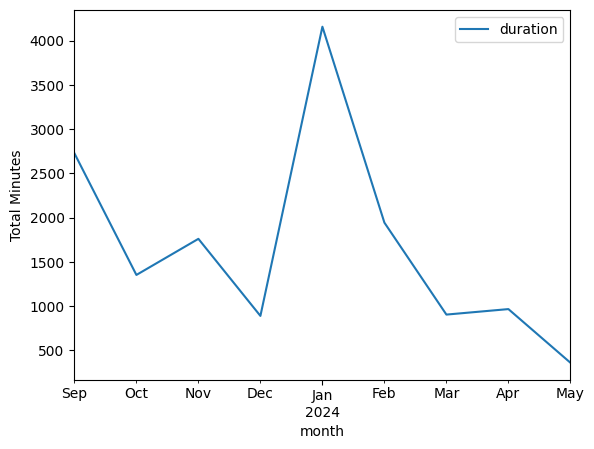

In [28]:
# create a new Year-Month column and group by it
# like .str, the .dt accessor is used to access the datetime properties of a Series
df['month'] = df['datetime'].dt.to_period('M')
# again, without numeric_only, our datetime column causes an error
chart_data = df.groupby("month").sum(numeric_only=True)
chart_data.plot().set_ylabel("Total Minutes")

I'll be honest, it seems like a lot of work to wrangle the appearance of these charts in Python. They're useful for a quick visual look into your data but you are probably better served using Pandas to aggregate and then exporting to some other visualization or spreadsheet application.

## Custom Indices


If our data has an identifier column, we can set it to function as the index.

In [69]:
# set the datetime column to be the index
df = df.set_index('datetime')
df.head()

,email,type,mode,patron category,topics,location,duration
datetime,,,,,,,
9/1/2023 10:54:50,calypso@cca.edu,Directional,Chat,Faculty,NaN,Aeaea,11
9/1/2023 11:09:25,circe@cca.edu,Reference,Email,Faculty,NaN,Aeaea,94
9/1/2023 13:18:22,calypso@cca.edu,Directional,Chat,Undergrad,NaN,Aeaea,35
9/5/2023 8:53:28,circe@cca.edu,Service,Email,Other,NaN,Aeaea,60
9/5/2023 11:27:44,circe@cca.edu,Service,Email,Staff,NaN,Aeaea,75


Most methods return a new DataFrame rather than modifying the original one, thus why we write `df = df.set_index('id')` to re-assign the new dataframe to the same variable, but many methods also have an `inplace` parameter which will modify the original DataFrame. Below, we reset the index back to the numeric row numbers Pandas created for us originally.

In [70]:
# reset the index
df.reset_index(inplace=True)
df.head()

,datetime,email,type,mode,patron category,topics,location,duration
0,9/1/2023 10:54:50,calypso@cca.edu,Directional,Chat,Faculty,NaN,Aeaea,11
1,9/1/2023 11:09:25,circe@cca.edu,Reference,Email,Faculty,NaN,Aeaea,94
2,9/1/2023 13:18:22,calypso@cca.edu,Directional,Chat,Undergrad,NaN,Aeaea,35
3,9/5/2023 8:53:28,circe@cca.edu,Service,Email,Other,NaN,Aeaea,60
4,9/5/2023 11:27:44,circe@cca.edu,Service,Email,Staff,NaN,Aeaea,75


We can even specify multiple columns to function as the index. The `set_index()` documentation shows [an example of using month and year](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html#:~:text=as%20other%20DataFrame.-,Examples,-%3E%3E%3E%20df%20%3D) columns to create a datetime index.

## More Resources

[Python for Data Analysis](https://wesmckinney.com/book/) is a free book by Wes McKinney, the creator of Pandas.

The Pandas [Getting started tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html) are really good.

There's no shortage of other learning resources about Pandas, but those two stand out as particularly helpful.

## Concrete Example: Video Content

A couple years ago, our video platform moved from an unlimited storage model to a tiered model with quotas for different types of hours of content. I had to analyze our current content to find a way to get under the quotas. That work is [on GitHub](https://github.com/cca/panopto-session-data) in [a notebook](https://github.com/cca/panopto-session-data/blob/main/notes.ipynb) that uses Pandas. Some of the facets of Pandas used include:

- Joining dataframes from two CSVs with a common key
- Creating derivative columns
- Converting a string column to dates
- Looking at different slices of the data in tables
- Creating filtered data frames based on conditions and time periods

I didn't do any visualization because the raw figures were more useful, and it's hard to rerun the notebook with access to the specific reports I had, but it gives a sense of how to approach a problem with Pandas.